# San Francisco Restaurant Project

## Inspection Scores

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_score_data = pd.read_csv('Restaurant_Scores_-_LIVES_Standard.csv')

In [3]:
raw_score_data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,1922,All stars Donuts,901 Clement St,San Francisco,CA,94118,37.782694,-122.468969,"(37.782694, -122.468969)",NaN,1922_20160225,02/25/2016 12:00:00 AM,86.0,Routine - Unscheduled,1922_20160225_103154,Unclean or degraded floors walls or ceilings,Low Risk
1,67448,Soo Fong Restaurant,3801 03rd St 370,San Francisco,CA,94124,37.741829,-122.388098,"(37.741829, -122.388098)",NaN,67448_20180507,05/07/2018 12:00:00 AM,92.0,Routine - Unscheduled,67448_20180507_103149,Wiping cloths not clean or properly stored or ...,Low Risk
2,1757,Dar Bar Pakistani/Indian Cusine,1412 Polk St,San Francisco,CA,94109,37.789784,-122.420455,"(37.789784, -122.420455)",NaN,1757_20170928,09/28/2017 12:00:00 AM,86.0,Routine - Unscheduled,1757_20170928_103131,Moderate risk vermin infestation,Moderate Risk
3,93022,Wise Sons Delicatessen,537 Octavia St,San Francisco,CA,94102,NaN,NaN,NaN,NaN,93022_20180907,09/07/2018 12:00:00 AM,92.0,Routine - Unscheduled,93022_20180907_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk
4,4864,DRAGON CITY BAKERY & CAFE,2367 MISSION St,San Francisco,CA,94110,37.759174,-122.419066,"(37.759174, -122.419066)",1.415583e+10,4864_20161206,12/06/2016 12:00:00 AM,84.0,Routine - Unscheduled,4864_20161206_103157,Food safety certificate or food handler card n...,Low Risk


## Data Cleaning

In [4]:
#replace 0 lat and long with np.nan
raw_score_data['business_latitude'] = raw_score_data['business_latitude'].replace(0, np.NaN)
raw_score_data['business_longitude'] = raw_score_data['business_longitude'].replace(0, np.NaN)

#drop NaN values in the colums we require 
clean_data = raw_score_data.dropna(axis=0, subset=['business_latitude', 'business_longitude', 'business_name', 'inspection_score'])
#drop unneccesary columns
clean_data = clean_data.drop(['inspection_id', 'violation_id', 'business_phone_number', 'inspection_type', 'business_location', 'violation_description'], axis = 1)
#convert inspection date to datetime object
clean_data['inspection_date'] = pd.to_datetime(clean_data['inspection_date'])
#sort the data by date and keep only the most recent inspection instance for each business
clean_data = clean_data.sort_values('inspection_date')
clean_data = clean_data.drop_duplicates('business_id', keep = 'last')
clean_data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,inspection_date,inspection_score,risk_category
27309,7119,LO-COST MEAT MARKET #2,2918 24th St,San Francisco,CA,94110,37.752768,-122.410472,2016-02-17,77.0,Low Risk
8967,64319,Littlegreencyclo LLC,Off The Grid-Upper Haight,San Francisco,CA,NaN,37.777122,-122.419639,2016-02-19,100.0,NaN
26003,4372,CLUB PUERTORRIQUENO OF SF INC.,3249A MISSION St,San Francisco,CA,94110,37.744901,-122.420273,2016-02-26,100.0,NaN
23218,67606,Mayo & Mustard,75 Hawthorne,San Francisco,CA,94105,37.785144,-122.398383,2016-02-26,96.0,Low Risk
40620,5291,EL TONAYENSE CATERING TRUCK #2,3101 19th St,San Francisco,CA,94110,37.760583,-122.413239,2016-02-29,90.0,Low Risk


Preliminary dropping of rows that aren't restaurants 

In [5]:
dropwords = ['mollie stone', 'chevron', 'shell' 'marriott', 'hilton', 'school', 'hotel', "church","cathedral","convention center", "mosque",
            "islamic","synagogue","jewish","museum","academy","temple","safeway","target","whole foods","gas","trader joe's",
            "market", "pharmacy", "cvs", "drug","hotel","marriot","westin","ritz", "steamer", "montessori ", "children", "AMC", "costco", "7-eleven"]

In [6]:
for word in dropwords: 
    droplist = list(clean_data[clean_data['business_name'].str.contains(word, case=False)].index)
    for i in droplist:
        clean_data = clean_data.drop(i)

clean_data was exported as clean_data_inital.csv for use with our data collection functions

In [7]:
clean_data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,inspection_date,inspection_score,risk_category
8967,64319,Littlegreencyclo LLC,Off The Grid-Upper Haight,San Francisco,CA,NaN,37.777122,-122.419639,2016-02-19,100.0,NaN
26003,4372,CLUB PUERTORRIQUENO OF SF INC.,3249A MISSION St,San Francisco,CA,94110,37.744901,-122.420273,2016-02-26,100.0,NaN
23218,67606,Mayo & Mustard,75 Hawthorne,San Francisco,CA,94105,37.785144,-122.398383,2016-02-26,96.0,Low Risk
40620,5291,EL TONAYENSE CATERING TRUCK #2,3101 19th St,San Francisco,CA,94110,37.760583,-122.413239,2016-02-29,90.0,Low Risk
5485,35503,Left Coast Catering and Cafe,2152 03rd St,San Francisco,CA,94107,37.762368,-122.388877,2016-03-11,98.0,Low Risk


## Initial Exploratory Data Analysis

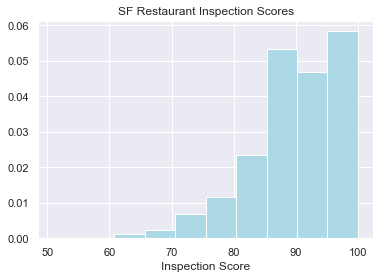

In [8]:
sns.set()
plt.hist(clean_data['inspection_score'], density=True, color ='lightblue' )
plt.title('SF Restaurant Inspection Scores')
plt.xlabel('Inspection Score')
plt.show()

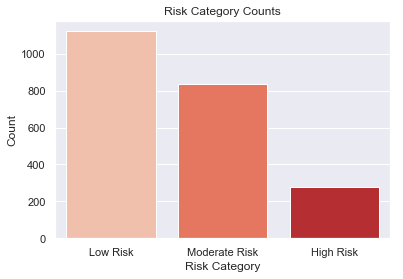

In [9]:
sns.countplot(clean_data['risk_category'], palette="Reds")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.title("Risk Category Counts")
plt.show()

Safely read in the API keys

In [10]:
import json
with open('keys.json') as file:
    keys = json.load(file)
GOOGLE_KEY = keys.get('google')
YELP_KEY = keys.get('yelp')

## Bokeh For Geographical Plotting

In [46]:
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap
from bokeh.transform import linear_cmap
from bokeh.palettes import Reds, Blues, Greens, Oranges
from bokeh.models import HoverTool, WheelZoomTool, PanTool

Select data and convert to ColumnDataSource for use with Bokeh

In [47]:
low_scores = ColumnDataSource(clean_data.loc[clean_data['inspection_score'] < 86])
mid_scores = ColumnDataSource(clean_data.loc[(clean_data['inspection_score'] >= 86) & (clean_data['inspection_score'] <=92)])
high_scores = ColumnDataSource(clean_data.loc[clean_data['inspection_score'] > 92])

Create an interactive map using Google Maps and Bokeh

In [49]:
output_notebook()
map_options = GMapOptions(lat=37.7749, lng=-122.4194, map_type="roadmap", zoom=11)

hover = HoverTool()
hover.tooltips = [("Name", "@business_name"), ("Inspection Score", "@inspection_score"), ("Risk", "@risk_category")]
p = gmap(GOOGLE_KEY, map_options, title="San Francisco Restaurant Health Inspection Scores", tools = [hover, WheelZoomTool(), PanTool()])

low_mapper = linear_cmap(field_name = 'inspection_score', palette=Reds[5], low = 50, high = 86)
mid_mapper = linear_cmap(field_name = 'inspection_score', palette=Blues[4], low = 92, high = 86)
high_mapper = linear_cmap(field_name = 'inspection_score', palette=Greens[4], low = 100, high = 92)


p.circle(x='business_longitude', y='business_latitude', size=3, color=low_mapper, 
         fill_alpha=0.7, source=low_scores, legend = "Low Scores")
p.circle(x='business_longitude', y='business_latitude', size=3, color=mid_mapper, 
         fill_alpha=0.7, source=mid_scores, legend = "Mid Scores")
p.circle(x='business_longitude', y='business_latitude', size=3, color=high_mapper, 
         fill_alpha=0.7, source=high_scores, legend = "High Scores")

p.legend.location = "top_left"
p.legend.click_policy="hide"
show(p)

Loading BokehJS ...

## Yelp Data Retrieval 

### Data Collection Functions Were Run Outside The Notebook

#### DataCollector.py

#### yelppull.py

These functions were used on clean_data_intial.csv and the data was dumped into apipull.txt

In [16]:
working_clean = pd.read_csv('clean_data_initial.csv')
working_yelp = working_clean

In [17]:
with open('apipull') as file:
    api_data = json.load(file)

### Extracting what we need from the api pull

clean_data and api_data have matching indices so they can be joined as working_yelp

api_data is a list full of restraurant information so we must extract what me need

In [18]:
working_yelp['api_data'] = api_data
working_yelp['api_data'] = working_yelp['api_data'].replace(0, np.NaN)
working_yelp = working_yelp.dropna(subset=['api_data'])

In [19]:
working_yelp['price'] = working_yelp['api_data'].apply(lambda x: x.get('price'))
working_yelp['rating'] = working_yelp['api_data'].apply(lambda x: x.get('rating'))
working_yelp['review_count'] = working_yelp['api_data'].apply(lambda x: x.get('review_count'))
working_yelp['hours']= working_yelp['api_data'].apply(lambda x: x.get('hours'))
working_yelp['yelp_id']= working_yelp['api_data'].apply(lambda x: x.get('id'))

/Users/samsheridan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/samsheridan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/samsheridan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [20]:
def get_cats(x):
    categories = []
    try:
        for value in x.get('categories')[0].values():
            categories.append(value)
        c = ", ".join(str(x) for x in categories)
    except:
        c = np.NaN
    return c

In [21]:
def get_trans(x):
    trans=[] 
    try:
        for val in x.get('transactions'):
            trans.append(val)   
        t = ", ".join(str(x) for x in trans)
    except: 
        t = np.NaN
    return t

In [22]:
working_yelp['categories'] = working_yelp['api_data'].apply(get_cats)
working_yelp['transactions'] = working_yelp['api_data'].apply(get_trans)

/Users/samsheridan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/samsheridan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
pricemap = {'$':"One", '$$':"Two", '$$$':"Three", "$$$$":"Four"}
p_dtype = pd.api.types.CategoricalDtype(categories=["One", "Two", "Three", "Four"], ordered=True)
working_yelp.replace(pricemap, inplace=True)
working_yelp['price'] = working_yelp['price'].astype(p_dtype)

/Users/samsheridan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/samsheridan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## Inspecting The Yelp Data

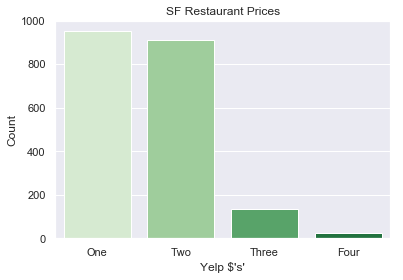

In [24]:
sns.countplot(working_yelp['price'], palette="Greens")
plt.xlabel("Yelp $'s'")
plt.ylabel("Count")
plt.title("SF Restaurant Prices")
plt.show()

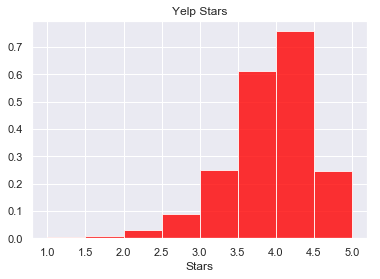

In [53]:
plt.hist(working_yelp['rating'], color = 'red', density = True, bins=8, alpha = 0.8)
plt.xlabel("Stars")
plt.title("Yelp Stars")
plt.show()

In [40]:
one_dollar = ColumnDataSource(working_yelp[['business_name', 'inspection_score','business_latitude', 'business_longitude', 'price', 'rating']].loc[working_yelp['price'] == 'One'])
two_dollar = ColumnDataSource(working_yelp[['business_name','inspection_score','business_latitude', 'business_longitude', 'price', 'rating']].loc[working_yelp['price'] == 'Two'])
three_dollar = ColumnDataSource(working_yelp[['business_name', 'inspection_score','business_latitude', 'business_longitude', 'price', 'rating']].loc[working_yelp['price'] == 'Three'])
four_dollar = ColumnDataSource(working_yelp[['business_name', 'inspection_score','business_latitude', 'business_longitude', 'price', 'rating']].loc[working_yelp['price'] == 'Four'])

In [54]:
output_notebook()
map_options = GMapOptions(lat=37.7749, lng=-122.4194, map_type="roadmap", zoom=11)

hover = HoverTool()
hover.tooltips = [("name", "@business_name"), ("rating", "@rating"), ("$", "@price"), ("Inspection Score", "@inspection_score")]

r = gmap(GOOGLE_KEY, map_options, title="San Francisco Restaurants by Price Level", tools = [hover, WheelZoomTool(), PanTool()])

one_mapper = linear_cmap(field_name = 'rating', palette=Blues[3], low = 5, high = 0)
two_mapper = linear_cmap(field_name = 'rating', palette=Greens[3], low = 5, high = 0)
three_mapper = linear_cmap(field_name = 'rating', palette=Oranges[3], low = 5, high = 0)
four_mapper = linear_cmap(field_name = 'rating', palette=Reds[3], low = 5, high = 0)

r.circle(x='business_longitude', y='business_latitude', size=3, color=one_mapper, 
        fill_alpha=0.6, source=one_dollar, legend = "$")
r.circle(x='business_longitude', y='business_latitude', size=3, color=two_mapper, 
         fill_alpha=0.6, source=two_dollar, legend = "$$")
r.circle(x='business_longitude', y='business_latitude', size=3, color=three_mapper, 
         fill_alpha=0.6, source=three_dollar, legend = "$$$")
r.circle(x='business_longitude', y='business_latitude', size=3, color=four_mapper, 
         fill_alpha=0.6, source=four_dollar, legend = "$$$$")

r.legend.location = "top_left"
r.legend.click_policy="hide"
show(r)

Loading BokehJS ...